# Exploring the Earnings of Recent Graduates

## Introduction

The aim of this project is to practice data visualisation within a Jupyter notebook, and to make some observations. The subject is earnings of recent graduates, the data of which is originally from this [FiveThirtyEight GitHub repository](https://github.com/fivethirtyeight/data/tree/master/college-majors).

### Data Dictionary
This table defines some of the columns in the dataset.

| Column            | Description                                                       |
| ----------------- | ----------------------------------------------------------------- |
| `Rank`            | Rank by median earnings (the dataset is ordered by this column)   |
| `Major_code`      | Major code                                                        |
| `Major`           | Major description                                                 |
| `Major_category`  | Category of major                                                 |
| `Total`           | Total number of people with major                                 |
| `Sample_size`     | Sample size (unweighted) of full-time                             |
| `Men`             | Male graduates                                                    |
| `Women`           | Female graduates                                                  |
| `ShareWomen`      | Women as share of total                                           |
| `Employed`        | Number employed                                                   |
| `Median`          | Median salary of full-time, year-round workers                    |
| `Low_wage_jobs`   | Number in low-wage service jobs                                   |
| `Full_time`       | Number employed 35 hours or more                                  |
| `Part_time`       | Number employed less than 35 hours                                |

## Preliminary Data Exploration

In [1]:
# import pandas and pyplot to process and visualise data
import pandas as pd
import matplotlib.pyplot as plt

# Jupyter magic to display plots inline
%matplotlib inline

# read in the data, print out some summary info, and clean out any null/nan entries
recent_grads = pd.read_csv('./recent-grads.csv')
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [2]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [4]:
# print summary stats for the dataframe
print(recent_grads.describe())

# print the number of rows
raw_data_count = recent_grads.shape[0]
print('\nTotal entries in data set: ', raw_data_count)

# identify majors with null entries
null_rows = recent_grads.isna().any(axis=1)
print('\nRows with null entires:\n', recent_grads.loc[null_rows, ['Major_code', 'Major', 'Major_category']])

# drop null entry rows and print remaining number of rows
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print('\nTotal entries in data set after dropping null entries: ', cleaned_data_count)

Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   42869.655092   1

The data set appears to be very clean on initial inspection. Dropping null entries only removes 1 row out of 173; this means that the Food Science major isn't represented in the following analysis.  
  
Some initial observations from the `describe()` method summary:
- There is a wide range of populations represented by this data, from around 100 to around 400,000.
- On average, women represent around 52% of class populations, but this varies greatly from one major to another. The proportion of women in a major can be as low as non-existent to as high as 97%.
- The average number of those employed on a part-time basis is around a quarter of the average number of those employed after graduating.
- The average unemployment rate is 6.8%, but is as high as 17.7%.
- Median salaries vary greatly, from \$22,000 up to \$110,000.

## Visualising Data

A number of plots are generated below to visualise the data set:
- `Sample_size` vs `Median`
- `Sample_size` vs `Unemployment_rate`
- `Full_time` vs `Median`
- `ShareWomen` vs `Unemployment_rate`
- `Men` vs `Median`
- `Women` vs `Median`

### Sample Size and Median Salary

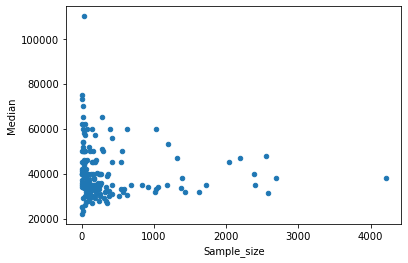

In [5]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
plt.show()

### Sample Size and Unemployment Rate

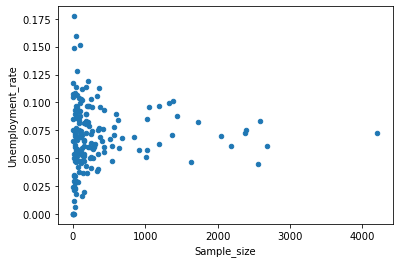

In [6]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
plt.show()

### No. in Full Time Employment and Median Salary

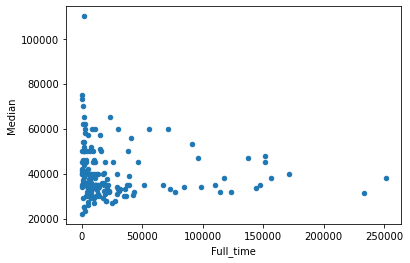

In [7]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')
plt.show()

### Percentage of Women and Median Salary

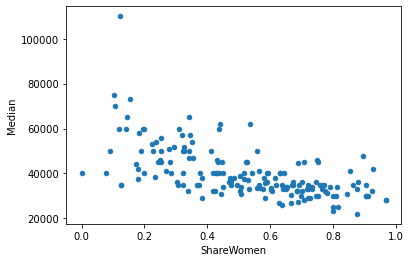

In [8]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')
plt.show()

### No. of Men and Median Salary

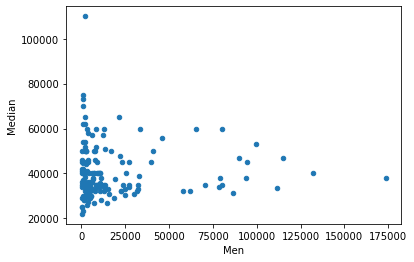

In [9]:
recent_grads.plot(x='Men', y='Median', kind='scatter')
plt.show()

### No. of Women and Median Salary

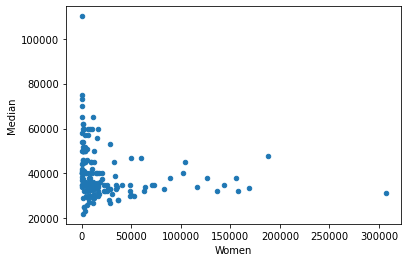

In [10]:
recent_grads.plot(x='Women', y='Median', kind='scatter')
plt.show()

### Observations

Considering whether students in more popular majors make more money, the above plots do not indicate that this is the case. If anything, popularity seems to funnel the median salary into a narrower range on the low end. For men, this range is of the order of \$35,000 to \$60,000; for women, this range is of the order of \$30,000 to \$50,000.  
  
Considering whether majors with higher proportions of women make more money, the pertinent scatter plot above seems to show a slight negative correlation, with the highest median salaries occuring in majors with around 15% women.  
  
Considering whether there is a link between the number of full-time employees and median salary, this is hard to judge. There is a larger spread amongst majors with lower numbers in full-time employment, with higher employee numbers rather consistent in approximately the \$30,000 to \$50,000 range.

## Histograms

### Sample_size

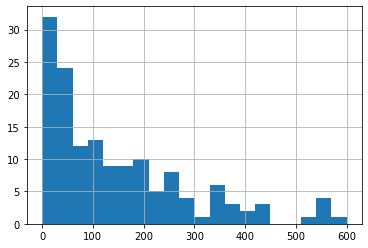

In [11]:
recent_grads['Sample_size'].hist(bins=20, range=(0, 600)).plot(kind='hist')
plt.show()

### Median

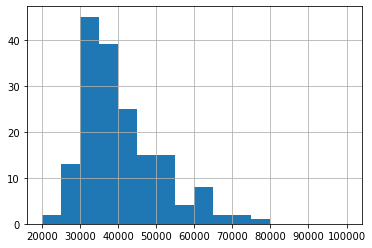

In [12]:
recent_grads['Median'].hist(bins=16, range=(20000, 100000)).plot(kind='hist')
plt.show()

### Employed

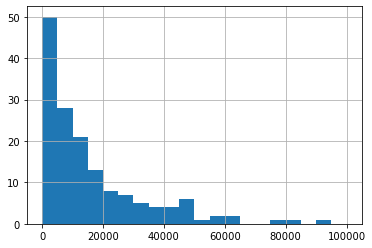

In [13]:
recent_grads['Employed'].hist(bins=20, range=(0, 100000)).plot(kind='hist')
plt.show()

### Full_time

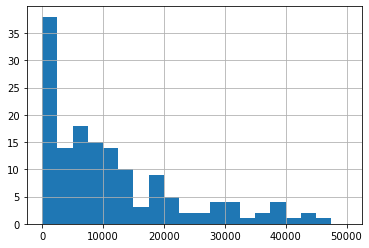

In [14]:
recent_grads['Full_time'].hist(bins=20, range=(0, 50000)).plot(kind='hist')
plt.show()

### ShareWomen

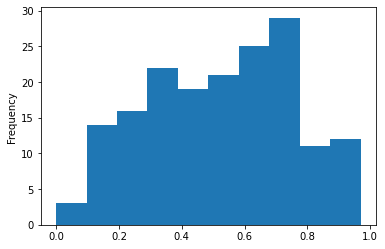

In [15]:
recent_grads['ShareWomen'].plot(kind='hist')
plt.show()

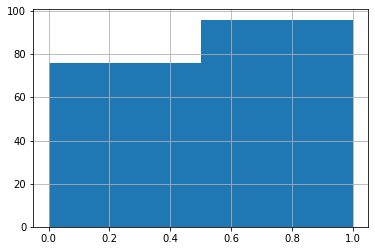

In [16]:
recent_grads['ShareWomen'].hist(bins=2, range=(0,1.0)).plot(kind='hist')
plt.show()

### Unemployment_rate

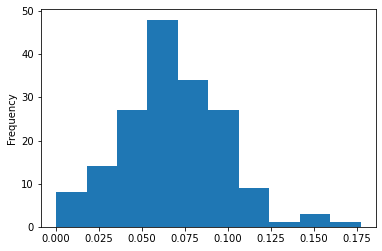

In [17]:
recent_grads['Unemployment_rate'].plot(kind='hist')
plt.show()

### Men

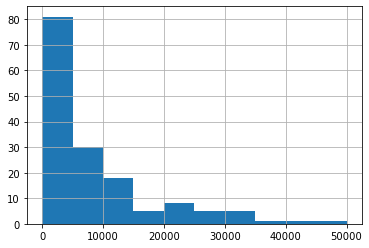

In [18]:
recent_grads['Men'].hist(range=(0, 50000)).plot(kind='hist')
plt.show()

### Women

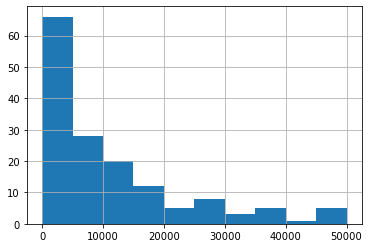

In [19]:
recent_grads['Women'].hist(range=(0, 50000)).plot(kind='hist')
plt.show()

### Observations
Plotting a second version of the `ShareWomen` histogram with just two bars, one representing predominantly male majors and the other predominantly female majors, there is a roughly 45%:55% split between predominantly male and predominantly female majors.  
  
The most common median salaries are in the \$30,000 to \$40,000 range.

## Scatter Matrix Plots

### Sample_size and Median

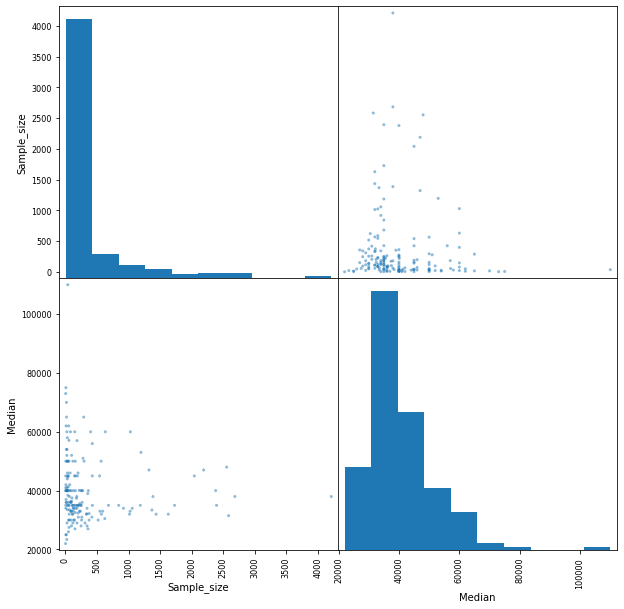

In [20]:
#import scatter_matrix from pandas
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10, 10))
plt.show()

### Sample_size, Median, and Unemployment_rate

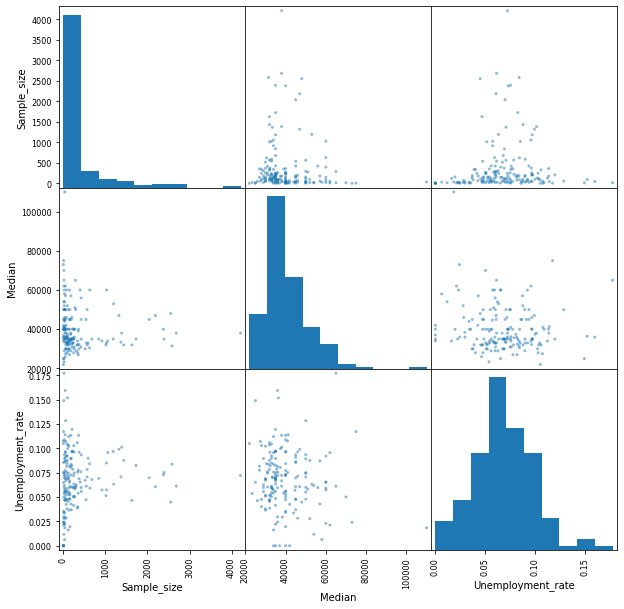

In [21]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10, 10))
plt.show()

## ShareWomen and Median

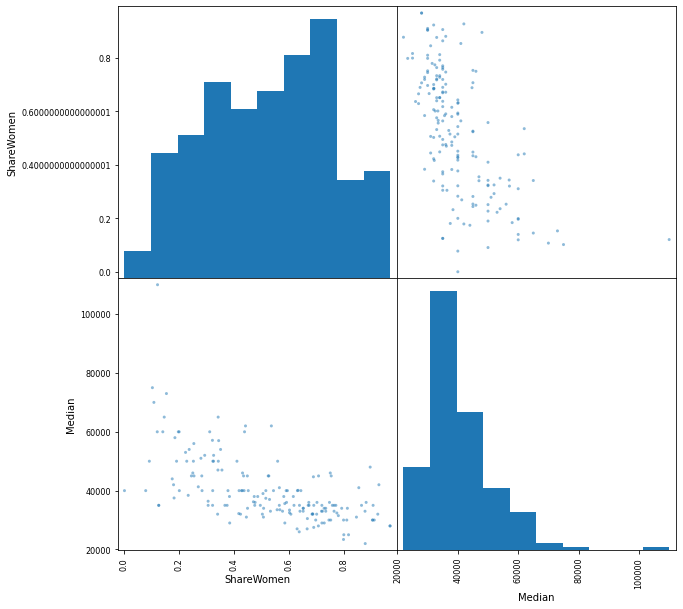

In [22]:
scatter_matrix(recent_grads[['ShareWomen', 'Median']], figsize=(10, 10))
plt.show()

## Bar Plots

### ShareWomen

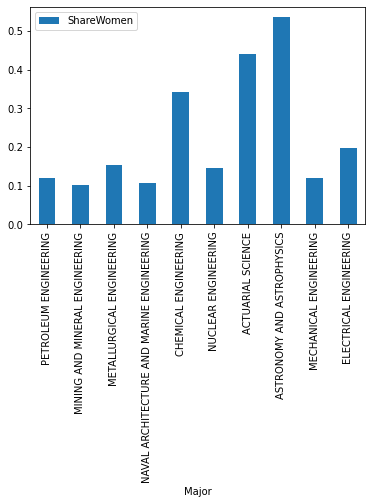

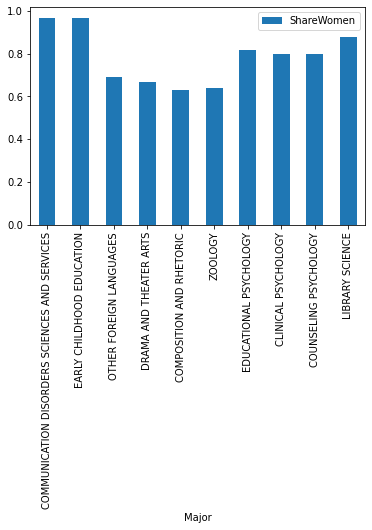

In [23]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
plt.show()
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')
plt.show()

### Unemployment_rate

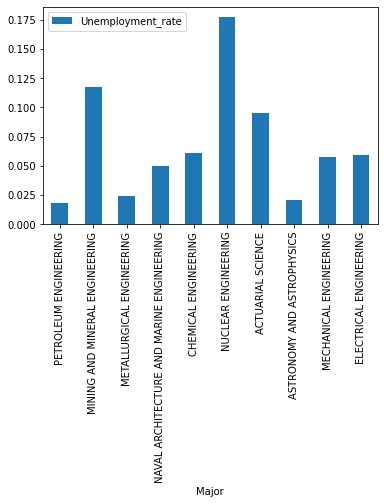

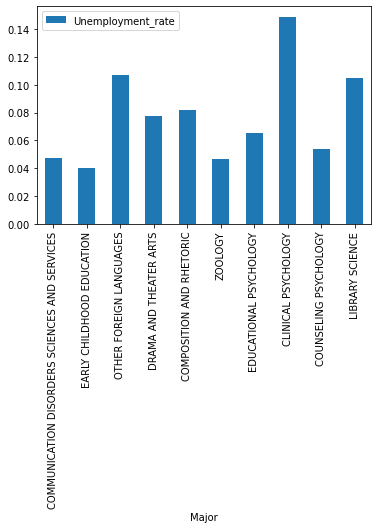

In [24]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
plt.show()
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')
plt.show()

## Grouped Bar Chart of Men and Women in Each Major Category
As a bit of further exploration, a grouped bar chart of men and women for each major category is shown below. It indicates that generally science, technology, engineering and maths (STEM) subjects tend to have lower representation of women. Health, humanities, arts, and communications subjects have much greater representation of women versus men, with health subjects in particular having more than 4 times as many women than men. Some major categories, law, agriculture, social sciences, physical sciences, and business, have an a roughly even representation of men and women.

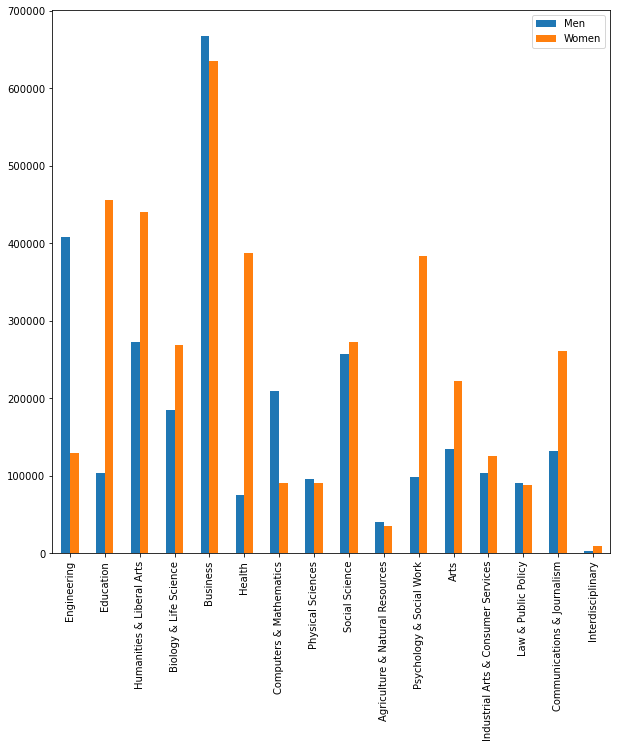

In [25]:
# create a series of the number of majors in each category
categories = recent_grads['Major_category'].value_counts()

# determine sub-totals of men and women for each major category
cats_men = {}
cats_women = {}
for cat in categories.index:
    sum_men = recent_grads.loc[recent_grads['Major_category']==cat, 'Men'].sum()
    sum_women = recent_grads.loc[recent_grads['Major_category']==cat, 'Women'].sum()
    cats_men[cat] = sum_men
    cats_women[cat] = sum_women
cats_men = pd.Series(cats_men)  # convert to pd series
cats_women = pd.Series(cats_women)  #convert to pd series

# create a dataframe of major categories and sub-totals of men and women for each category
major_cats = pd.DataFrame(cats_men, columns=['Men'])
major_cats['Women'] = cats_women
major_cats.plot.bar(figsize=(10, 10))
plt.show()

#### _Postscript_

_This guided project was originally completed in May 2020, and reviewed and tidied up in June 2020._